# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

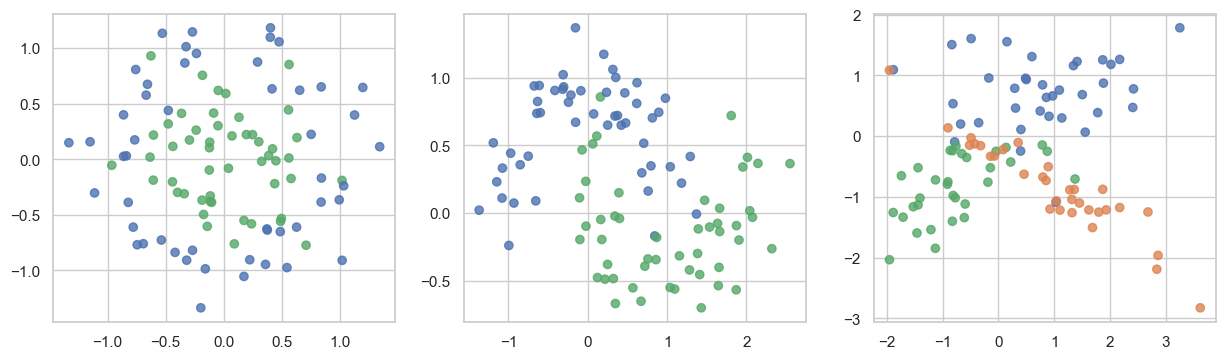

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

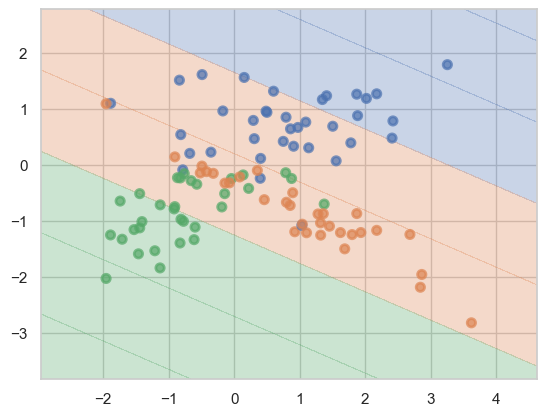

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

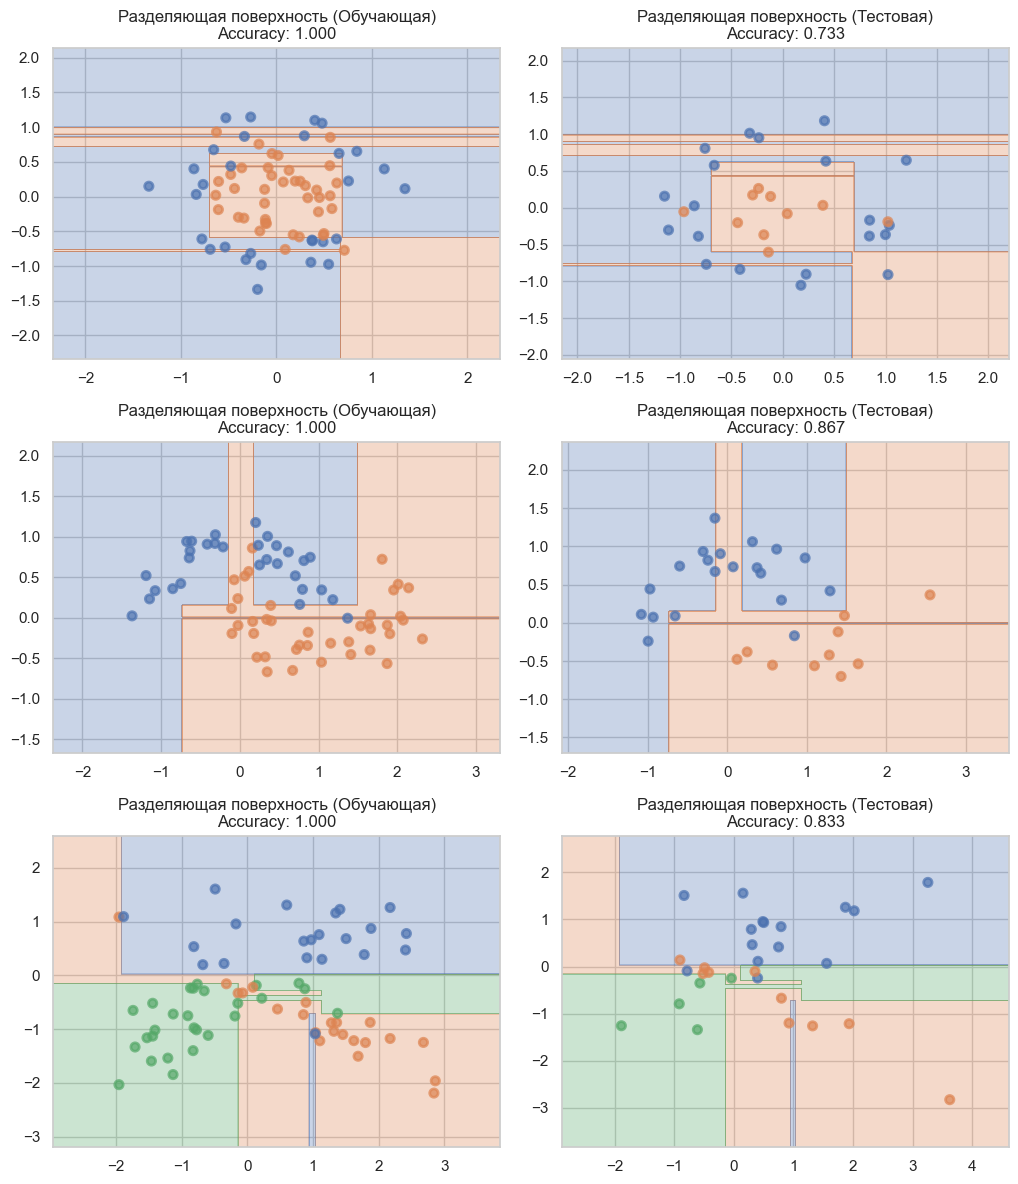

Анализ переобучения:

Circles:
Обучающая точность: 1.000
Тестовая точность: 0.733
Разница (переобучение): 0.267
Сильное переобучение

Moons:
Обучающая точность: 1.000
Тестовая точность: 0.867
Разница (переобучение): 0.133
Сильное переобучение

Classification (3 classes):
Обучающая точность: 1.000
Тестовая точность: 0.833
Разница (переобучение): 0.167
Сильное переобучение


In [8]:

from sklearn.metrics import accuracy_score
names = ['Circles', 'Moons', 'Classification (3 classes)']

plt.figure(figsize=(15, 12))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    plt.subplot(3, 3, i*3 + 2)
    plot_surface(clf, X_train, y_train)
    plt.title(f'Разделяющая поверхность (Обучающая)\nAccuracy: {train_acc:.3f}')
    
    plt.subplot(3, 3, i*3 + 3)
    plot_surface(clf, X_test, y_test)
    plt.title(f'Разделяющая поверхность (Тестовая)\nAccuracy: {test_acc:.3f}')

plt.tight_layout()
plt.show()

print("Анализ переобучения:")
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    gap = train_acc - test_acc
    
    print(f"\n{names[i]}:")
    print(f"Обучающая точность: {train_acc:.3f}")
    print(f"Тестовая точность: {test_acc:.3f}")
    print(f"Разница (переобучение): {gap:.3f}")
    print("Сильное переобучение" if gap > 0.1 else "Умеренное переобучение")

__Ответ:__

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


ДАТАСЕТ: Circles

Без регуляризации
(max_depth=None, min_samples_leaf=1)
  Обучающая точность: 1.000
  Тестовая точность:  0.733
  Разница: 0.267
  Глубина дерева: 6
  Количество листьев: 14

Ограничение глубины
(max_depth=3, min_samples_leaf=1)
  Обучающая точность: 0.886
  Тестовая точность:  0.733
  Разница: 0.152
  Глубина дерева: 3
  Количество листьев: 7

Ограничение листьев
(max_depth=None, min_samples_leaf=10)
  Обучающая точность: 0.814
  Тестовая точность:  0.767
  Разница: 0.048
  Глубина дерева: 4
  Количество листьев: 5

Комбинированная
(max_depth=5, min_samples_leaf=5)
  Обучающая точность: 0.871
  Тестовая точность:  0.900
  Разница: -0.029
  Глубина дерева: 5
  Количество листьев: 8

Сильная регуляризация
(max_depth=2, min_samples_leaf=20)
  Обучающая точность: 0.686
  Тестовая точность:  0.733
  Разница: -0.048
  Глубина дерева: 2
  Количество листьев: 3


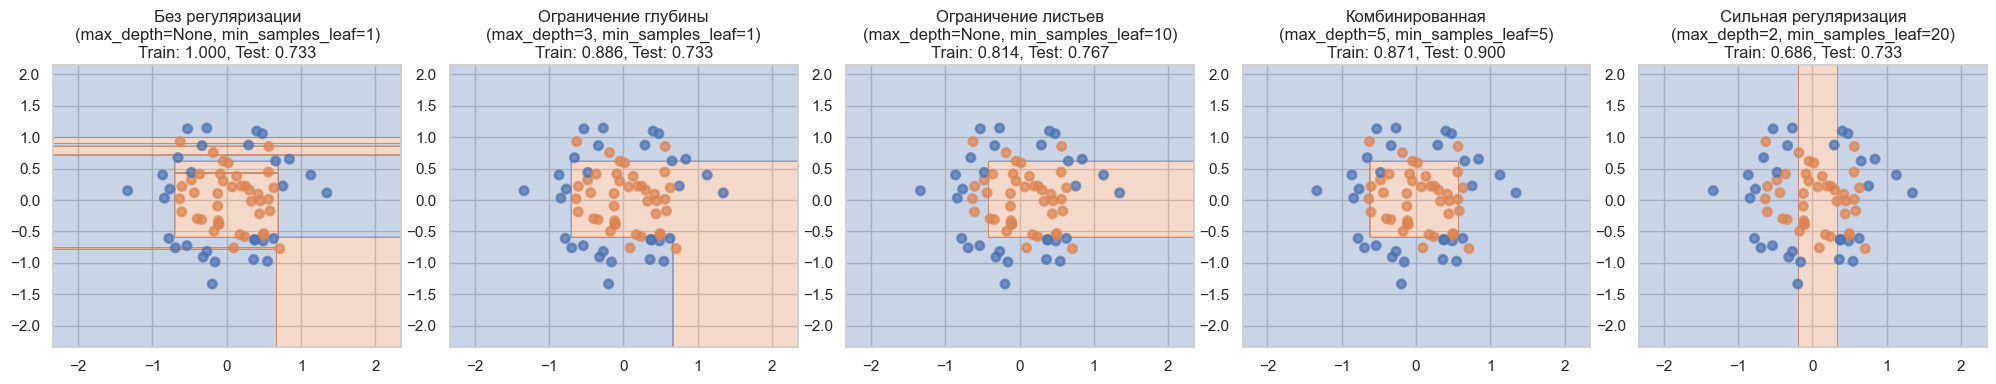


ДАТАСЕТ: Moons

Без регуляризации
(max_depth=None, min_samples_leaf=1)
  Обучающая точность: 1.000
  Тестовая точность:  0.867
  Разница: 0.133
  Глубина дерева: 4
  Количество листьев: 8

Ограничение глубины
(max_depth=3, min_samples_leaf=1)
  Обучающая точность: 0.914
  Тестовая точность:  0.933
  Разница: -0.019
  Глубина дерева: 3
  Количество листьев: 6

Ограничение листьев
(max_depth=None, min_samples_leaf=10)
  Обучающая точность: 0.871
  Тестовая точность:  0.767
  Разница: 0.105
  Глубина дерева: 3
  Количество листьев: 5

Комбинированная
(max_depth=5, min_samples_leaf=5)
  Обучающая точность: 0.957
  Тестовая точность:  0.733
  Разница: 0.224
  Глубина дерева: 4
  Количество листьев: 6

Сильная регуляризация
(max_depth=2, min_samples_leaf=20)
  Обучающая точность: 0.843
  Тестовая точность:  0.800
  Разница: 0.043
  Глубина дерева: 1
  Количество листьев: 2


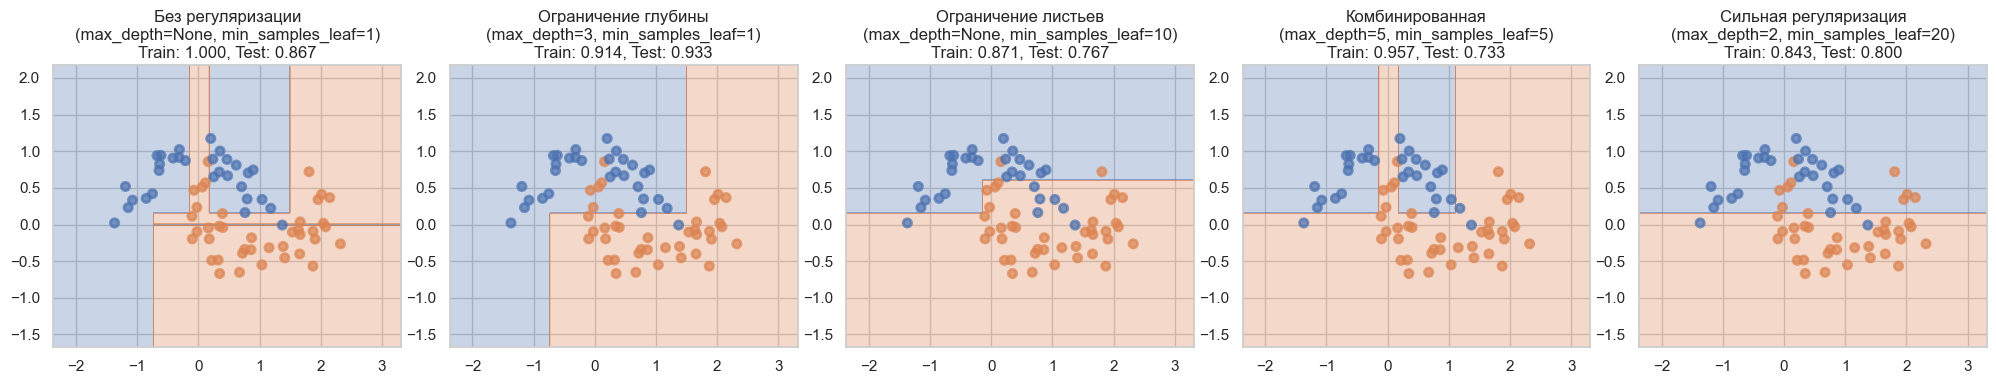


ДАТАСЕТ: Classification (3 classes)

Без регуляризации
(max_depth=None, min_samples_leaf=1)
  Обучающая точность: 1.000
  Тестовая точность:  0.833
  Разница: 0.167
  Глубина дерева: 7
  Количество листьев: 13

Ограничение глубины
(max_depth=3, min_samples_leaf=1)
  Обучающая точность: 0.943
  Тестовая точность:  0.867
  Разница: 0.076
  Глубина дерева: 3
  Количество листьев: 6

Ограничение листьев
(max_depth=None, min_samples_leaf=10)
  Обучающая точность: 0.886
  Тестовая точность:  0.767
  Разница: 0.119
  Глубина дерева: 3
  Количество листьев: 6

Комбинированная
(max_depth=5, min_samples_leaf=5)
  Обучающая точность: 0.900
  Тестовая точность:  0.700
  Разница: 0.200
  Глубина дерева: 4
  Количество листьев: 8

Сильная регуляризация
(max_depth=2, min_samples_leaf=20)
  Обучающая точность: 0.886
  Тестовая точность:  0.767
  Разница: 0.119
  Глубина дерева: 2
  Количество листьев: 3


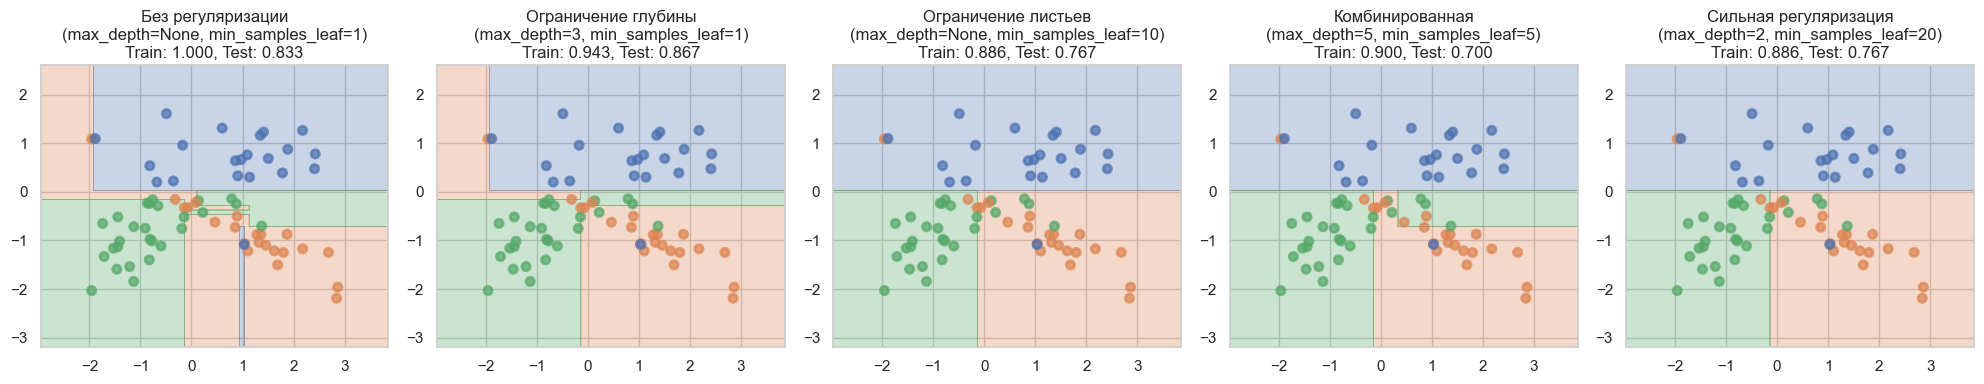


--- Анализ Circles ---

Влияние max_depth (min_samples_leaf=1):
  max_depth=None: train=1.000, test=0.733, gap=0.267
  max_depth=2: train=0.829, test=0.633, gap=0.195
  max_depth=3: train=0.886, test=0.733, gap=0.152
  max_depth=5: train=0.971, test=0.767, gap=0.205
  max_depth=10: train=1.000, test=0.733, gap=0.267

Влияние min_samples_leaf (max_depth=None):
  min_samples_leaf=1: train=1.000, test=0.733, gap=0.267
  min_samples_leaf=2: train=0.943, test=0.833, gap=0.110
  min_samples_leaf=5: train=0.871, test=0.900, gap=-0.029
  min_samples_leaf=10: train=0.814, test=0.767, gap=0.048
  min_samples_leaf=20: train=0.686, test=0.733, gap=-0.048

--- Анализ Moons ---

Влияние max_depth (min_samples_leaf=1):
  max_depth=None: train=1.000, test=0.867, gap=0.133
  max_depth=2: train=0.914, test=0.933, gap=-0.019
  max_depth=3: train=0.914, test=0.933, gap=-0.019
  max_depth=5: train=1.000, test=0.867, gap=0.133
  max_depth=10: train=1.000, test=0.867, gap=0.133

Влияние min_samples_leaf (ma

In [9]:
param_combinations = [
    {'max_depth': None, 'min_samples_leaf': 1},     
    {'max_depth': 3, 'min_samples_leaf': 1},         
    {'max_depth': None, 'min_samples_leaf': 10},    
    {'max_depth': 5, 'min_samples_leaf': 5},         
    {'max_depth': 2, 'min_samples_leaf': 20},        
]

param_names = [
    "Без регуляризации\n(max_depth=None, min_samples_leaf=1)",
    "Ограничение глубины\n(max_depth=3, min_samples_leaf=1)", 
    "Ограничение листьев\n(max_depth=None, min_samples_leaf=10)",
    "Комбинированная\n(max_depth=5, min_samples_leaf=5)",
    "Сильная регуляризация\n(max_depth=2, min_samples_leaf=20)"
]

random_state = 42

for dataset_idx, (X, y) in enumerate(datasets):
    print(f"\n{'='*60}")
    print(f"ДАТАСЕТ: {names[dataset_idx]}")
    print(f"{'='*60}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=random_state
    )
    
    plt.figure(figsize=(20, 4))
    
    for param_idx, params in enumerate(param_combinations):
        clf = DecisionTreeClassifier(**params, random_state=random_state)
        clf.fit(X_train, y_train)
        
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
        
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        gap = train_acc - test_acc
        
        plt.subplot(1, 5, param_idx + 1)
        plot_surface(clf, X_train, y_train)
        plt.title(f"{param_names[param_idx]}\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}")
        
        print(f"\n{param_names[param_idx]}")
        print(f"  Обучающая точность: {train_acc:.3f}")
        print(f"  Тестовая точность:  {test_acc:.3f}")
        print(f"  Разница: {gap:.3f}")
        print(f"  Глубина дерева: {clf.get_depth()}")
        print(f"  Количество листьев: {clf.get_n_leaves()}")
    
    plt.tight_layout()
    plt.show()



for dataset_idx, (X, y) in enumerate(datasets):
    print(f"\n--- Анализ {names[dataset_idx]} ---")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=random_state
    )
    
    print("\nВлияние max_depth (min_samples_leaf=1):")
    for max_depth in [None, 2, 3, 5, 10]:
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=1, random_state=random_state)
        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        print(f"  max_depth={max_depth}: train={train_acc:.3f}, test={test_acc:.3f}, gap={train_acc-test_acc:.3f}")
    
    print("\nВлияние min_samples_leaf (max_depth=None):")
    for min_samples_leaf in [1, 2, 5, 10, 20]:
        clf = DecisionTreeClassifier(max_depth=None, min_samples_leaf=min_samples_leaf, random_state=random_state)
        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        print(f"  min_samples_leaf={min_samples_leaf}: train={train_acc:.3f}, test={test_acc:.3f}, gap={train_acc-test_acc:.3f}")

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

In [30]:
def find_best_split(feature_vector, target_vector):
    
    if len(feature_vector) == 0:
        return np.array([]), np.array([]), None, None
    
    sorted_indices = np.argsort(feature_vector)
    feature_sorted = feature_vector[sorted_indices]
    target_sorted = target_vector[sorted_indices]
    
    thresholds = (feature_sorted[1:] + feature_sorted[:-1]) / 2.0
    
    unique_thresholds, unique_indices = np.unique(thresholds, return_index=True)
    thresholds = unique_thresholds
    
    if len(thresholds) == 0:
        return np.array([]), np.array([]), None, None
    
    n_total = len(feature_sorted)
    cumsum_class1 = np.cumsum(target_sorted)
    cumsum_class0 = np.cumsum(1 - target_sorted)
    
    split_indices = np.searchsorted(feature_sorted, thresholds, side='right')
    
    left_sizes = split_indices
    right_sizes = n_total - left_sizes
    
    valid_mask = (left_sizes > 0) & (right_sizes > 0)
    thresholds = thresholds[valid_mask]
    left_sizes = left_sizes[valid_mask]
    right_sizes = right_sizes[valid_mask]
    split_indices = split_indices[valid_mask]
    
    if len(thresholds) == 0:
        return np.array([]), np.array([]), None, None
    
    left_class1 = cumsum_class1[split_indices - 1]
    left_class0 = cumsum_class0[split_indices - 1]
    right_class1 = cumsum_class1[-1] - left_class1
    right_class0 = cumsum_class0[-1] - left_class0
    
    left_p1 = left_class1 / left_sizes
    left_p0 = left_class0 / left_sizes
    right_p1 = right_class1 / right_sizes
    right_p0 = right_class0 / right_sizes
    
    H_left = 1 - left_p1**2 - left_p0**2
    H_right = 1 - right_p1**2 - right_p0**2
    
    ginis = - (left_sizes / n_total) * H_left - (right_sizes / n_total) * H_right
    
    if len(ginis) > 0:
        max_gini = np.max(ginis)
        best_indices = np.where(ginis == max_gini)[0]
        best_idx = best_indices[np.argmin(thresholds[best_indices])]
        threshold_best = thresholds[best_idx]
        gini_best = ginis[best_idx]
    else:
        threshold_best = None
        gini_best = None
    
    return thresholds, ginis, threshold_best, gini_best

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

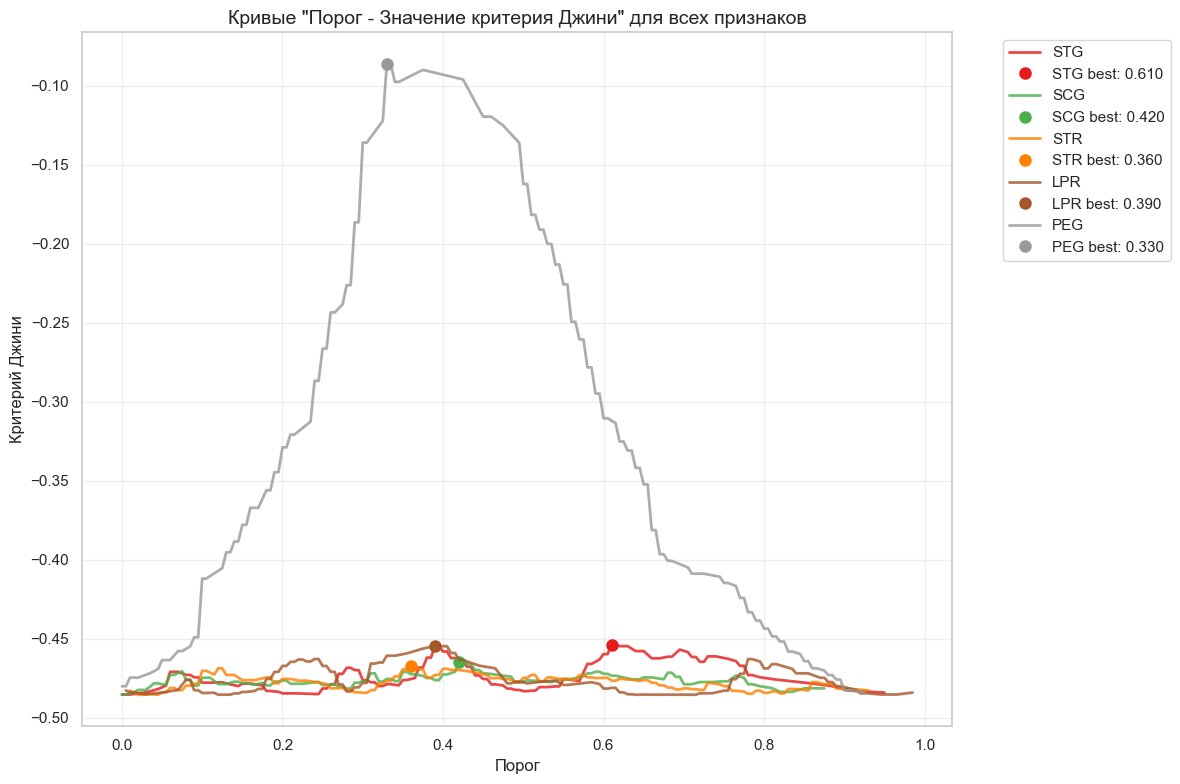

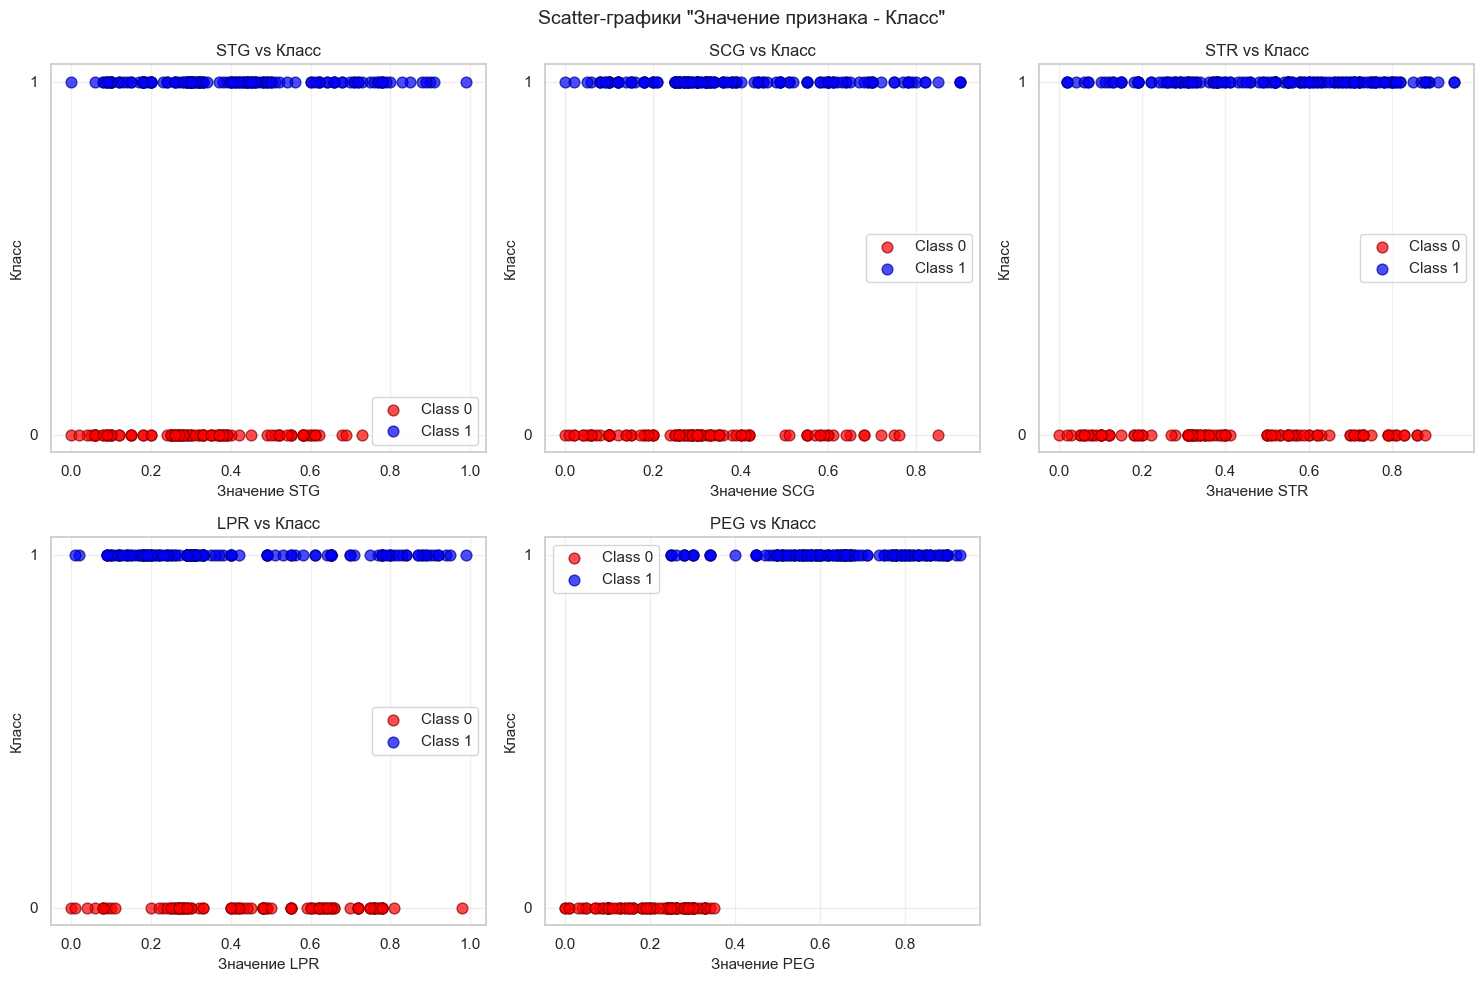

In [31]:
df = pd.read_csv('datasets/students.csv')

features = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
target = 'UNS'
y = df[target].values

colors = plt.cm.Set1(np.linspace(0, 1, len(features)))

plt.figure(figsize=(12, 8))

best_thresholds = []
best_ginis = []

for i, feature in enumerate(features):
    feature_values = df[feature].values
    thresholds, ginis, best_threshold, best_gini = find_best_split(feature_values, y)
    
    if len(thresholds) > 0:
        plt.plot(thresholds, ginis, color=colors[i], linewidth=2, label=feature, alpha=0.8)
        plt.plot(best_threshold, best_gini, 'o', color=colors[i], markersize=8, 
                label=f'{feature} best: {best_threshold:.3f}')
        best_thresholds.append(best_threshold)
        best_ginis.append(best_gini)

plt.xlabel('Порог', fontsize=12)
plt.ylabel('Критерий Джини', fontsize=12)
plt.title('Кривые "Порог - Значение критерия Джини" для всех признаков', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i in range(5, 6):
    fig.delaxes(axes[i])

for i, feature in enumerate(features):
    feature_values = df[feature].values
    
    class_0 = feature_values[y == 0]
    class_1 = feature_values[y == 1]
    
    axes[i].scatter(class_0, np.zeros_like(class_0), alpha=0.7, color='red', 
                   label='Class 0', s=60, edgecolors='darkred', linewidth=1)
    axes[i].scatter(class_1, np.ones_like(class_1), alpha=0.7, color='blue', 
                   label='Class 1', s=60, edgecolors='darkblue', linewidth=1)

    axes[i].set_xlabel(f'Значение {feature}', fontsize=11)
    axes[i].set_ylabel('Класс', fontsize=11)
    axes[i].set_title(f'{feature} vs Класс', fontsize=12)
    axes[i].set_yticks([0, 1])
    axes[i].set_yticklabels(['0', '1'])
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Scatter-графики "Значение признака - Класс"', fontsize=14)
plt.tight_layout()
plt.show()



__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Лучший признак это PEG, судя по графику. Кривая джини резко поднимается и опускается, а у плохих признаков график почти плоский.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [32]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [33]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: